### It is a German credit card dataset. Here we have Age column which shows the age of persons, Sex column which shows the gender that is male or female, Job column shows skill level of person that is how much skilled that person is like 0-unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled, Hosing column shows the residence condition of person that is if that person has their own , rent or free housing, Saving accounts column shows the ammount of saving that person has in their bank account that is low,moderate,quitely rich and rich, Checking account column shows the amount of time that person check his/her bank account that is little,moderate and rich, Credit amount column shows hoe much money credited in that account, Duration column shows the value of month for their bank account, Purpose column shows perticularly why the bank account is used for..

# <ins> The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. <ins>

### <h1>Columns of the dataset and their meaning are as follows;</h1>

#### Age (numeric)
#### Sex (text: male, female)
#### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#### Housing (text: own, rent, or free)
#### Saving accounts (text - little, moderate, quite rich, rich)
#### Checking account (text - little, moderate, rich)
#### Credit amount (numeric, in Deutsche Mark)
#### Duration (numeric, in month)
#### Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#Loading the data
credit_card_df = pd.read_csv("C:/Users/test/Downloads/german_credit_data (2).csv",index_col=0)
credit_card_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
credit_card_df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


| Feature | Category |                              
|:---------|----------:|
| Age | Discrete |
| Sex | Nominal |
| Job | Likert |
| Housing | Ordinal |
| Saving accounts | Ordinal |
| Checking account | Ordinal |
| Credit amount | Continous |
| Duration | Discrete |
| Purpose | Nominal |

### Here
| Content | Values |
|---------|--------|
| Little | Low |
| Moderate | Midium |
| Quit rich | High |
| Rich | Very High |

   

In [4]:
#Summary of the data
credit_card_df.shape

(1000, 9)

### This data set has 1000 rows and 9 columns..

In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [6]:
#Change job to categorical
credit_card_df['Job'] = credit_card_df['Job'].astype('category')

In [7]:
#Null values
credit_card_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
#all unique values
print(credit_card_df["Saving accounts"].unique())
print(credit_card_df["Checking account"].unique())

[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']


### Here we can say whose age is less than 25 mostly have a little amount in their savings, because mostly they are either students or freashers. And the whose age is more than 60, they are  old people and mostly they have a moderate account.

### We can fill these null values by 'little' , because in this age gap there is a small number of people whose bank balance is more than little.

In [9]:
# values where age is less than 25 or greater than 60
df_20_60 = credit_card_df[(credit_card_df['Age'] <= 25) | (credit_card_df['Age'] >= 60)]
#Nan values in saving accounts and checking accounts
df_20_60.isnull().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts     39
Checking account    69
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [10]:
df_60 = credit_card_df[credit_card_df['Age'] > 60]
df_60["Saving accounts"].value_counts()

little        27
quite rich     4
rich           2
moderate       2
Name: Saving accounts, dtype: int64

In [11]:
df_20 = credit_card_df[credit_card_df['Age'] < 25]
df_20["Saving accounts"].value_counts()

little        95
moderate      19
quite rich    10
rich           6
Name: Saving accounts, dtype: int64

In [12]:
#Fill the data set with mode
df_20_60["Saving accounts"].fillna(df_20_60["Saving accounts"].mode()[0],inplace=True)

In [13]:
df_20_60.isnull().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts      0
Checking account    69
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [14]:
#values where age is between 25 to 60
df_more_than_20 = credit_card_df[(credit_card_df["Age"]>25) & (credit_card_df["Age"]<60)]
df_more_than_20["Saving accounts"].isnull().sum()

144

In [15]:
#Values count in saving accounts
df_more_than_20["Saving accounts"].value_counts()

little        450
moderate       78
quite rich     48
rich           39
Name: Saving accounts, dtype: int64

In [16]:
#convert to dummy variables
df_more_than_20["Saving accounts"] = df_more_than_20["Saving accounts"].replace(['little'],0)
df_more_than_20["Saving accounts"] = df_more_than_20["Saving accounts"].replace(['moderate'],1)
df_more_than_20["Saving accounts"] = df_more_than_20["Saving accounts"].replace(['quite rich'],2)
df_more_than_20["Saving accounts"] = df_more_than_20["Saving accounts"].replace(['rich'],3)

In [17]:
#convert saving accounts to float
df_more_than_20["Saving accounts"] = df_more_than_20["Saving accounts"].astype(float)

In [18]:
#fill nan values with KNN
from fancyimpute import KNN
knn_imputer = KNN()
df_more_than_20["Saving accounts"] = knn_imputer.fit_transform(df_more_than_20["Saving accounts"].values.reshape(-1,1))

Imputing row 1/759 with 0 missing, elapsed time: 0.032
Imputing row 101/759 with 1 missing, elapsed time: 0.032
Imputing row 201/759 with 1 missing, elapsed time: 0.032
Imputing row 301/759 with 0 missing, elapsed time: 0.032
Imputing row 401/759 with 0 missing, elapsed time: 0.032
Imputing row 501/759 with 0 missing, elapsed time: 0.032
Imputing row 601/759 with 0 missing, elapsed time: 0.032
Imputing row 701/759 with 1 missing, elapsed time: 0.032
[KNN] Warning: 144/759 still missing after imputation, replacing with 0


In [19]:
df_more_than_20.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    325
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [20]:
#merge the two data sets
df_merge = pd.concat([df_20_60,df_more_than_20],axis=0)

In [21]:
df_merge.shape

(1000, 9)

In [22]:
#replace dummy variables with real values
df_merge["Saving accounts"] = df_merge["Saving accounts"].replace([0],['little'])
df_merge["Saving accounts"] = df_merge["Saving accounts"].replace([1],['moderate'])
df_merge["Saving accounts"] = df_merge["Saving accounts"].replace([2],['quite rich'])
df_merge["Saving accounts"] = df_merge["Saving accounts"].replace([3],['rich'])

In [23]:
df_merge.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [24]:
df_merge.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
994,50,male,2,own,little,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [25]:
#rows where saving accounts is little and checking account is little
df1 = df_merge[(df_merge["Saving accounts"]=='little') & (df_merge["Checking account"]=='little')]
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
11,24,female,2,rent,little,little,4308,48,business
13,60,male,1,own,little,little,1199,24,car
17,25,male,2,own,little,little,8072,30,business
29,63,male,2,own,little,little,6836,60,business
...,...,...,...,...,...,...,...,...,...
973,36,male,2,rent,little,little,7297,60,business
983,26,male,2,own,little,little,8229,36,car
988,29,male,3,free,little,little,6579,24,car
993,30,male,3,own,little,little,3959,36,furniture/equipment


In [26]:
#rows where saving accounts is little
df2 = df_merge[df_merge["Saving accounts"]=='little']
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
10,25,female,2,rent,little,moderate,1295,12,car
11,24,female,2,rent,little,little,4308,48,business
12,22,female,2,own,little,moderate,1567,12,radio/TV
...,...,...,...,...,...,...,...,...,...
993,30,male,3,own,little,little,3959,36,furniture/equipment
994,50,male,2,own,little,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car


### Out of 786 rows where saving accounts value are little, only 248 rows have checking account values are little. So we can't fill the null values of checking account with little where saving account is little

In [27]:
df_merge['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

### Here also we can not take mode as null values because little and moderate is in ratio nearly 1:1

In [28]:
#convert to dummy variables
df_merge["Checking account"] = df_merge["Checking account"].replace(['little'],0)
df_merge["Checking account"] = df_merge["Checking account"].replace(['moderate'],1)
df_merge["Checking account"] = df_merge["Checking account"].replace(['rich'],2)

In [29]:
#convert checking accounts to float
df_merge["Checking account"] = df_merge["Checking account"].astype(float)

In [30]:
#fill nan values with KNN
df_merge["Checking account"] = knn_imputer.fit_transform(df_merge["Checking account"].values.reshape(-1,1))

Imputing row 1/1000 with 0 missing, elapsed time: 0.052
Imputing row 101/1000 with 0 missing, elapsed time: 0.052
Imputing row 201/1000 with 0 missing, elapsed time: 0.052
Imputing row 301/1000 with 1 missing, elapsed time: 0.052
Imputing row 401/1000 with 1 missing, elapsed time: 0.052
Imputing row 501/1000 with 0 missing, elapsed time: 0.052
Imputing row 601/1000 with 0 missing, elapsed time: 0.052
Imputing row 701/1000 with 1 missing, elapsed time: 0.052
Imputing row 801/1000 with 1 missing, elapsed time: 0.052
Imputing row 901/1000 with 0 missing, elapsed time: 0.052
[KNN] Warning: 394/1000 still missing after imputation, replacing with 0


In [31]:
#Replace dummy variables with real values
df_merge["Checking account"] = df_merge["Checking account"].replace([0],['little'])
df_merge["Checking account"] = df_merge["Checking account"].replace([1],['moderate'])
df_merge["Checking account"] = df_merge["Checking account"].replace([2],['rich'])

In [32]:
#convert saving accounts and checking accounts to object
df_merge["Saving accounts"] = df_merge["Saving accounts"].astype(str)
df_merge["Checking account"] = df_merge["Checking account"].astype(str)

In [33]:
df_merge.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
8,61,male,1,own,rich,little,3059,12,radio/TV
10,25,female,2,rent,little,moderate,1295,12,car
11,24,female,2,rent,little,little,4308,48,business


In [34]:
df_merge.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [35]:
#all unique values
print(df_merge["Age"].unique())
print(df_merge["Job"].unique())
print(df_merge["Sex"].unique())
print(df_merge["Housing"].unique())
print(df_merge["Duration"].unique())
print(df_merge["Purpose"].unique())
print(df_merge["Credit amount"].unique())
print(df_merge["Saving accounts"].unique())
print(df_merge["Checking account"].unique())

[67 22 61 25 24 60 63 23 66 20 21 70 65 74 68 64 75 19 62 49 45 53 35 28
 32 44 31 48 26 36 39 42 34 27 30 57 33 37 58 29 52 50 46 51 41 40 47 56
 54 38 43 55 59]
[2, 1, 0, 3]
Categories (4, int64): [0, 1, 2, 3]
['male' 'female']
['own' 'rent' 'free']
[ 6 48 12 24 30 60 45  9 18 36 15 33 21 10 11 16  8 13 22  5 42 39 14 72
 27 20  4  7 54 47 28 26 40]
['radio/TV' 'car' 'business' 'furniture/equipment' 'education'
 'domestic appliances' 'vacation/others' 'repairs']
[ 1169  5951  3059  1295  4308  1567  1199  8072  6836  4746   458  6187
  1352  1262  1961  6229  1953 14421  1007  2394  1526  3832  1568  3617
  2012  2323   932   392  7855  4281  1835  1768   781  8487 10144   766
  2462  2288  5848  1282  7308  1577  3972   571  5129  1175   674  3031
   902  6568  1908  3913  3021  1364  1200  1478  3149   866 14555  2767
  4605  1258   433  2150  2030  3812   999  3368  1520  4675  4811  1237
   276  5511   685  6615  7408 11590  4110  2101  1275  5743  3213   882
  3758  1236  1246  

### There are no special characters in our dataset

In [36]:
#make data frame without null values
credit_card_df_no_null = credit_card_df.dropna()

<AxesSubplot:xlabel='Saving accounts', ylabel='Credit amount'>

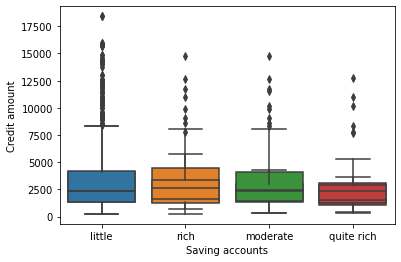

In [37]:
#compare the two data sets with boxplot
sns.boxplot(x="Saving accounts",y="Credit amount",data=credit_card_df_no_null)
sns.boxplot(x="Saving accounts",y="Credit amount",data=df_merge)

<AxesSubplot:xlabel='Checking account', ylabel='Credit amount'>

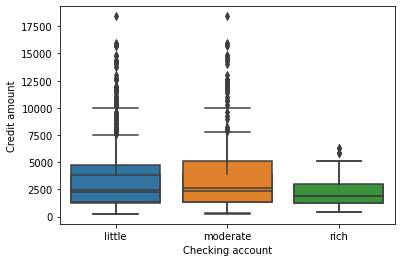

In [38]:
sns.boxplot(x="Checking account",y="Credit amount",data=credit_card_df_no_null)
sns.boxplot(x="Checking account",y="Credit amount",data=df_merge)

### We can see from above plots, the plot of original data set and our clean data set are nearly equal..

In [39]:
#find skewness of the data
skew_df = df_merge.skew()
skew_df

Age              1.020739
Credit amount    1.949628
Duration         1.094184
dtype: float64

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

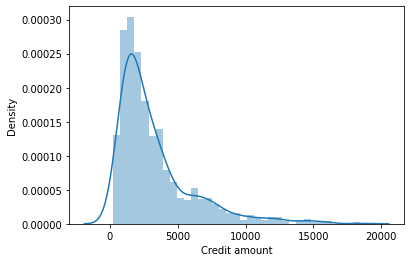

In [40]:
#skewness of the data
sns.distplot(df_merge["Credit amount"])

In [41]:
#convert log distribution
df_merge["Credit amount"] = np.log(df_merge["Credit amount"])

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

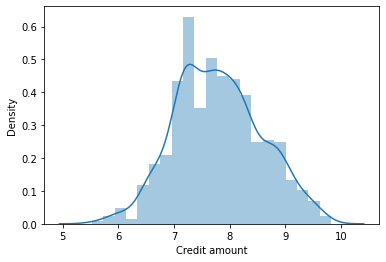

In [42]:
sns.distplot(df_merge["Credit amount"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

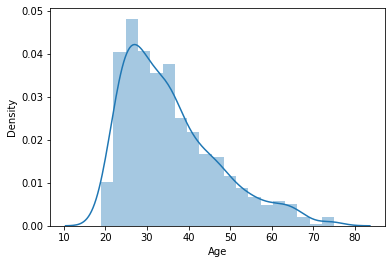

In [43]:
sns.distplot(df_merge["Age"])

In [44]:
#convert log distribution
df_merge["Age"] = np.log(df_merge["Age"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

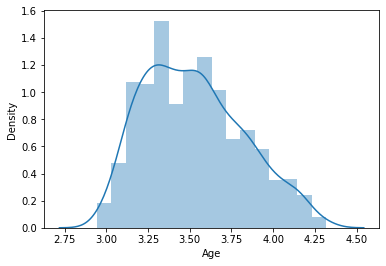

In [45]:
sns.distplot(df_merge["Age"])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

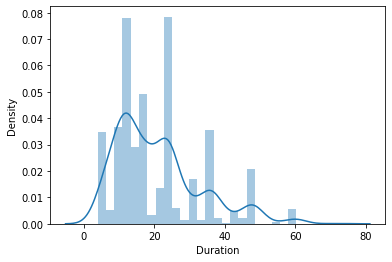

In [46]:
sns.distplot(df_merge["Duration"])

In [47]:
#convert log distribution
df_merge["Duration"] = np.log(df_merge["Duration"])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

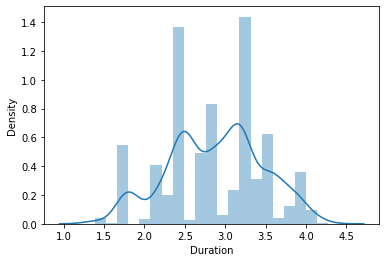

In [48]:
sns.distplot(df_merge["Duration"])

In [49]:
df_merge.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4.204693,male,2,own,little,little,7.063904,1.791759,radio/TV
1,3.091042,female,2,own,little,moderate,8.691315,3.871201,radio/TV
8,4.110874,male,1,own,rich,little,8.025843,2.484907,radio/TV
10,3.218876,female,2,rent,little,moderate,7.166266,2.484907,car
11,3.178054,female,2,rent,little,little,8.368229,3.871201,business


<AxesSubplot:ylabel='Age'>

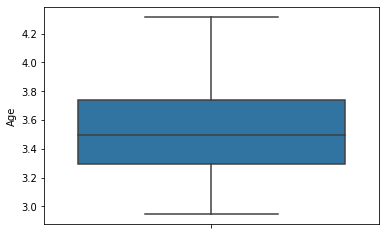

In [50]:
#box plot to find outliers
sns.boxplot(y="Age",data=df_merge)

<AxesSubplot:ylabel='Duration'>

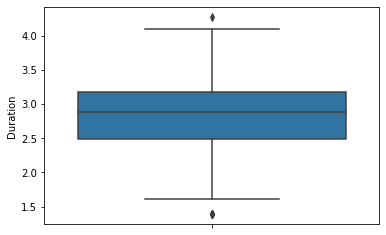

In [51]:
sns.boxplot(y="Duration",data=df_merge)

<AxesSubplot:ylabel='Credit amount'>

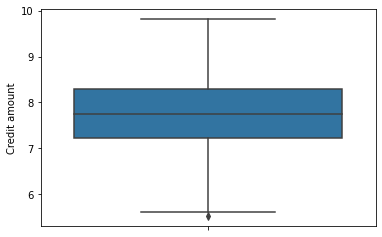

In [52]:
sns.boxplot(y="Credit amount",data=df_merge)

In [53]:
#find IQR
Q1 = df_merge["Credit amount"].quantile(0.25)
Q3 = df_merge["Credit amount"].quantile(0.75)
IQR = Q3-Q1
Lower_bracket = Q1 - 1.5*IQR
Upper_bracket = Q3 + 1.5*IQR

In [54]:
#Find outliers
Outliers = []
for i in range(len(df_merge["Credit amount"])):
    if df_merge["Credit amount"][i] < Lower_bracket or df_merge["Credit amount"][i] > Upper_bracket:
        Outliers.append(i)
        
Outliers        

[725]

In [55]:
#find IQR
Q1 = df_merge["Duration"].quantile(0.25)
Q3 = df_merge["Duration"].quantile(0.75)
IQR = Q3-Q1
Lower_bracket = Q1 - 1.5*IQR
Upper_bracket = Q3 + 1.5*IQR

In [56]:
#Find Outliers_D
Outliers_D = []
for i in range(len(df_merge["Duration"])):
    if df_merge["Duration"][i] < Lower_bracket or df_merge["Duration"][i] > Upper_bracket:
        Outliers_D.append(i)

Outliers_D
    

[234, 314, 527, 677, 734, 837, 943]

In [57]:
#remove outliers
df_merge = df_merge.drop(df_merge.index[Outliers])
df_merge = df_merge.drop(df_merge.index[Outliers_D])

## Distribution of Numerical Variables

In [58]:
df_age = df_merge["Age"]
print(min(df_age),max(df_age))

2.9444389791664403 4.31748811353631


In [59]:
bin_values = np.arange(start=2.5, stop=4.5, step=0.05)
print (bin_values)

[2.5  2.55 2.6  2.65 2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15
 3.2  3.25 3.3  3.35 3.4  3.45 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85
 3.9  3.95 4.   4.05 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45]


<AxesSubplot:>

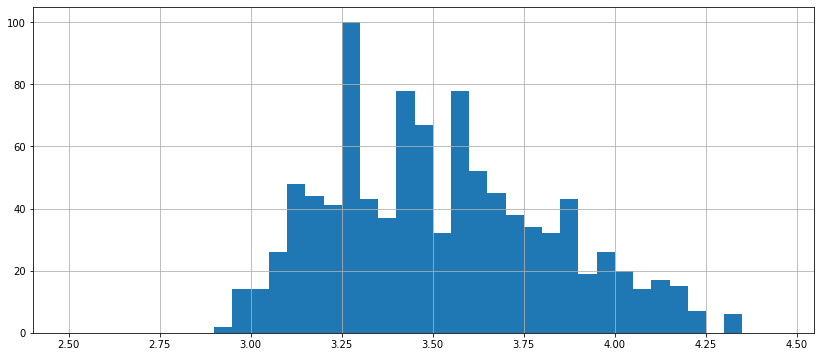

In [60]:
df_merge['Age'].hist(bins=bin_values, figsize=[14,6])

<AxesSubplot:ylabel='Duration'>

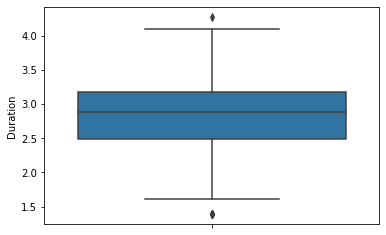

In [61]:
sns.boxplot(y="Duration",data=df_merge)

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

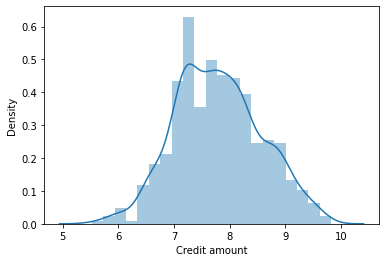

In [62]:
sns.distplot(df_merge["Credit amount"])

## Distribution of Categorical Variables

<AxesSubplot:xlabel='Sex', ylabel='count'>

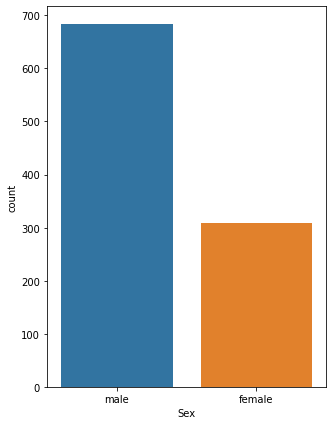

In [63]:
#Count plot
plt.figure(figsize=(5,7))
sns.countplot(x="Sex",data=df_merge)

<AxesSubplot:xlabel='Job', ylabel='count'>

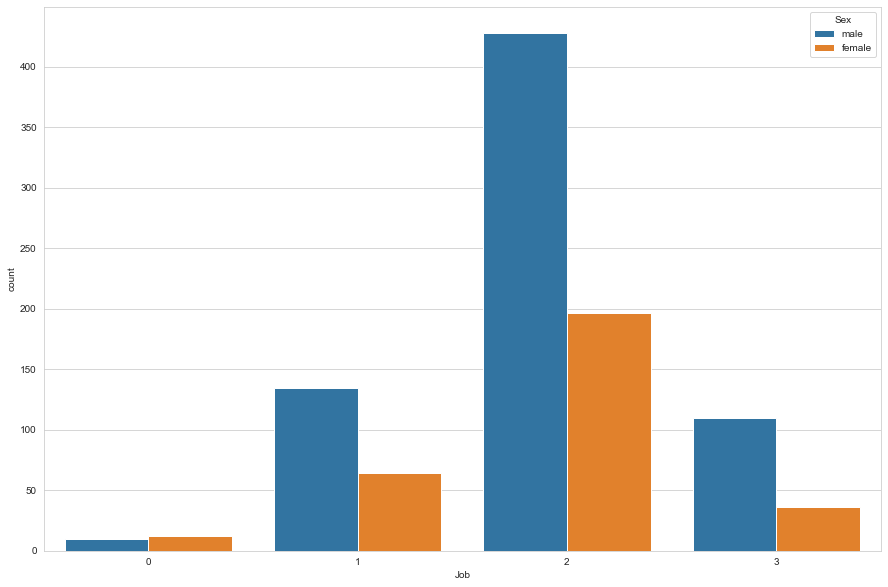

In [64]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x="Job",hue="Sex",data=df_merge)

<AxesSubplot:xlabel='Housing', ylabel='count'>

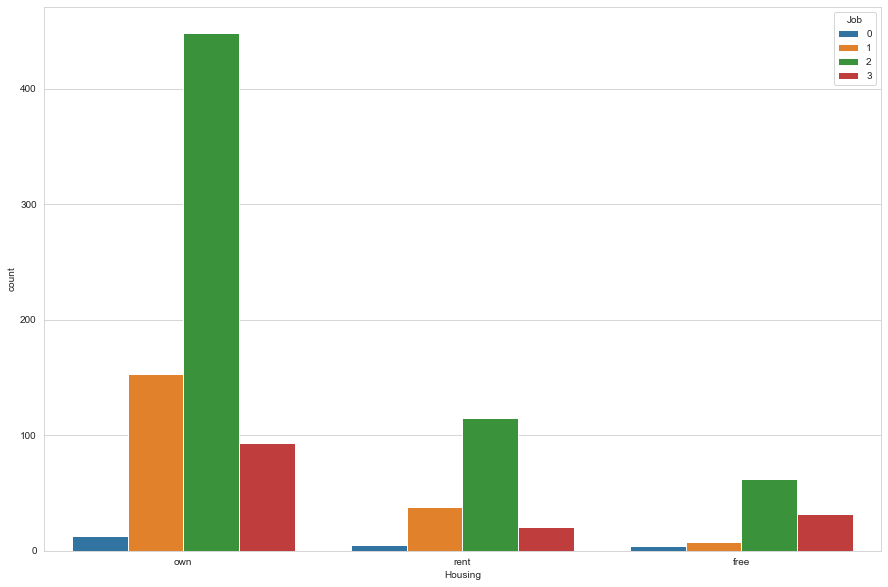

In [65]:
plt.figure(figsize=(15,10))
sns.countplot(x="Housing",hue='Job',data=df_merge)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

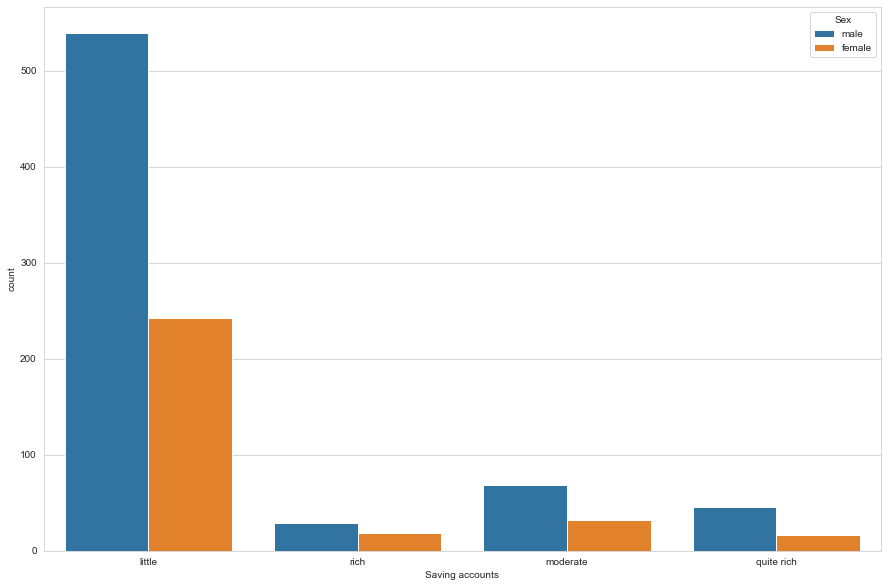

In [66]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x ="Saving accounts",hue="Sex",data=df_merge)

<AxesSubplot:xlabel='Checking account', ylabel='count'>

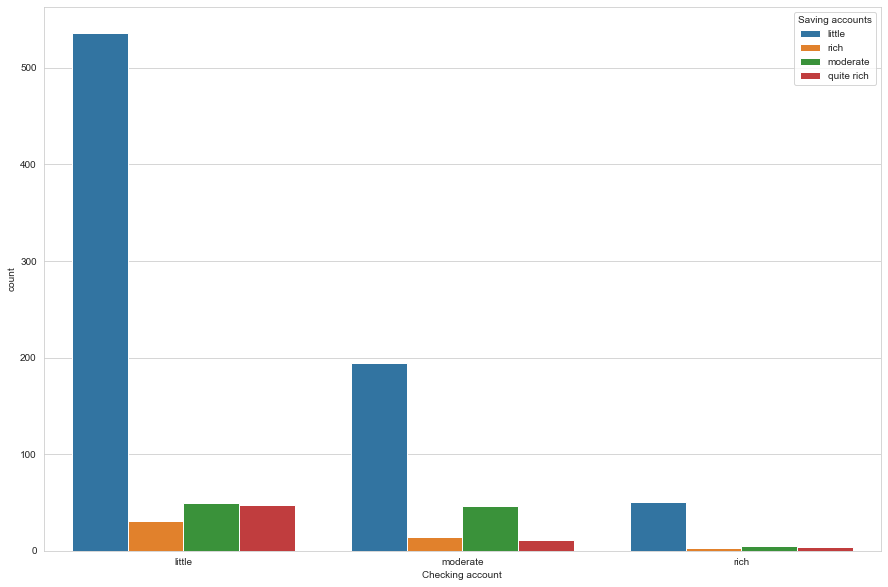

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(x='Checking account',hue ="Saving accounts",data=df_merge)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

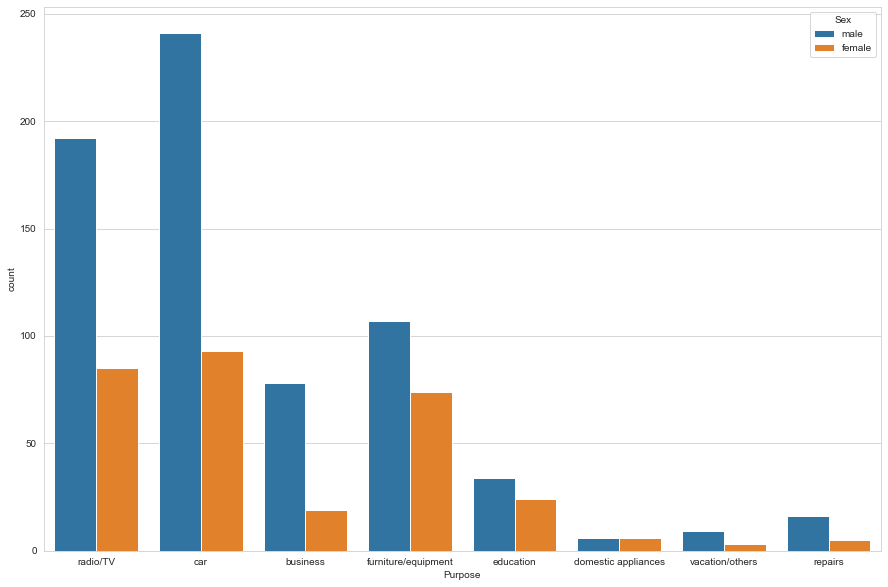

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x ="Purpose",hue="Sex",data=df_merge)

### Saving accounts vs Age

<AxesSubplot:xlabel='Saving accounts', ylabel='Age'>

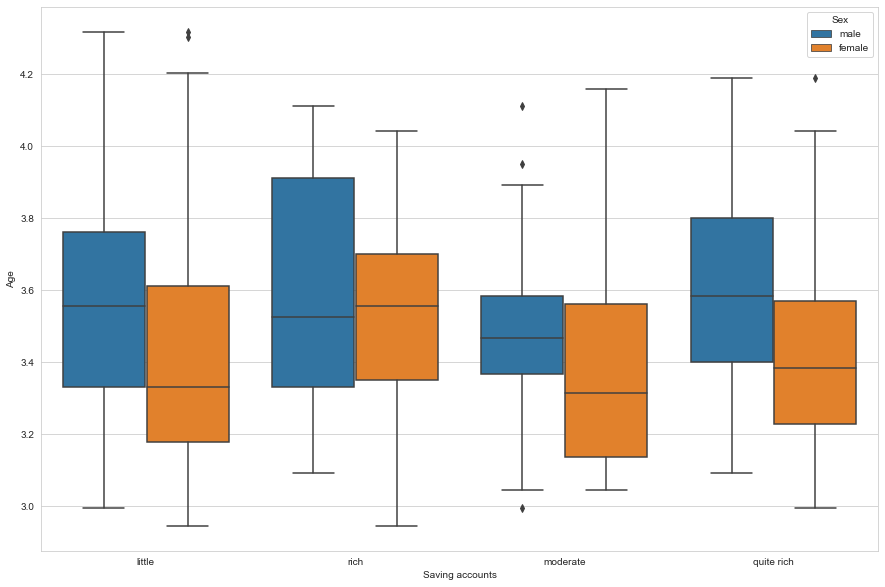

In [77]:
#Plot Box plot for Saving account vs Age
plt.figure(figsize=(15,10))
sns.boxplot(x='Saving accounts',y='Age',hue='Sex',data=df_merge)

<AxesSubplot:xlabel='Housing', ylabel='Credit amount'>

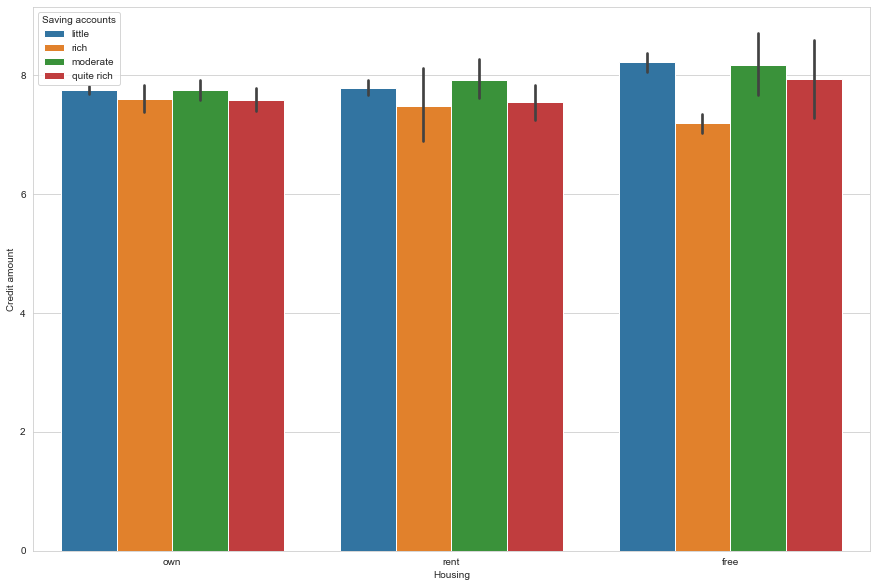

In [70]:
#Housing vs Credit amount for different Saving accounts
plt.figure(figsize=(15,10))
sns.barplot(x='Housing',y='Credit amount',hue='Saving accounts',data=df_merge)

<AxesSubplot:xlabel='Checking account', ylabel='Duration'>

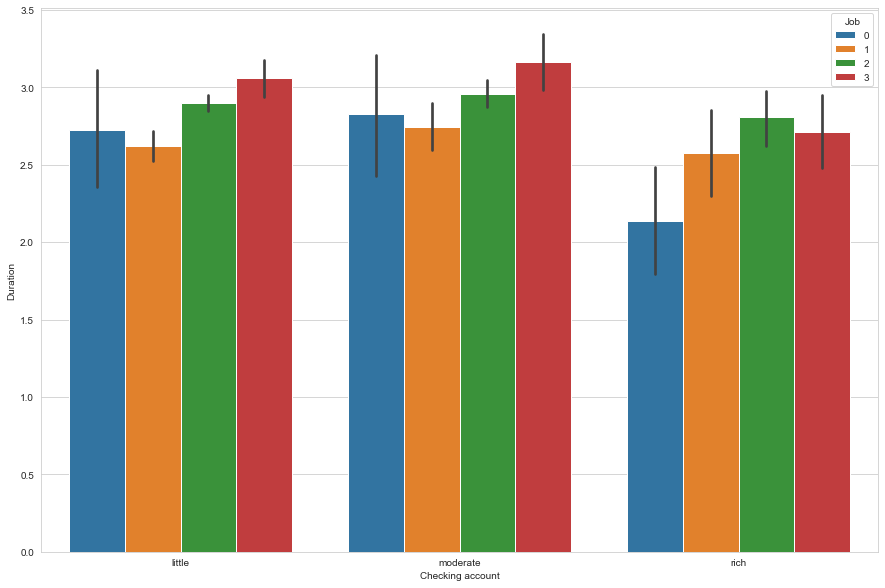

In [71]:
#Checking account vs Duration for different Job
plt.figure(figsize=(15,10))
sns.barplot(x='Checking account',y='Duration',hue='Job',data=df_merge)

## Numerical vs Numerical Plots

### Here I want see how Age impacts on Credit amount for Male and Female..

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

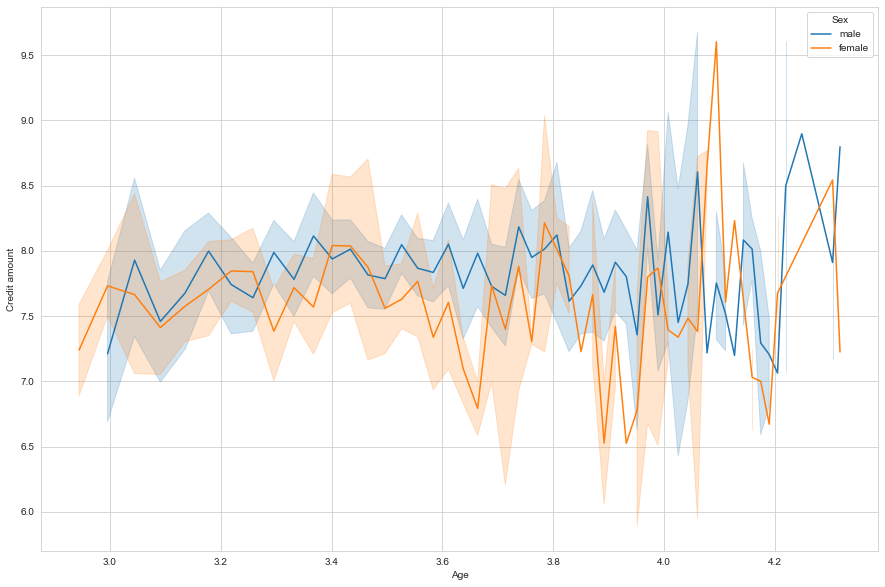

In [72]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Age',y='Credit amount',hue='Sex',data=df_merge)

### We can completely see the trend is nearly in parallel in both fale and female. There are no drastic changes in credit amount with increase in age. But we can say in male there is more credit amount than female.

### Here I want see if there is any trend in between Duration and credit amount for Male and Female

<Figure size 1080x720 with 0 Axes>

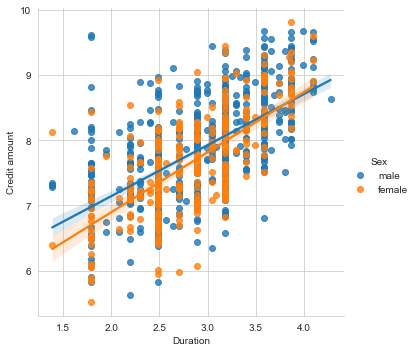

In [75]:
plt.figure(figsize=(15,10))
sns.lmplot(x='Duration',y='Credit amount',hue='Sex',data=df_merge)

### We can clearly see there is an uptrend .. Here credit amount is increasing with duration in both male and female cases..